# Visualizing Frechet Bounds

# Headers, helper methods

In [1]:
import numpy as np, pandas as pd
import scipy.stats as spst

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import plotly.figure_factory as FF
import plotly.graph_objs as go
import chart_studio.plotly as py

from scipy.spatial import Delaunay

In [2]:
def plot_frechet_mpl(x,y,xlabel,ylabel,figname):
    bottom_frechet = lambda x,y: np.array([max(xi+y[i]+1-2, 0) 
                                         for i,xi in enumerate(x) ])
    top_frechet = lambda x,y: np.array([min(xi,y[i]) for i,xi in enumerate(x)])
    #plot the trisurf for frechet bottom and top
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1,2,1,projection='3d') 
    ax.plot_trisurf(x,y,bottom_frechet(x,y), 
                    linewidth=0.2, antialiased=True,alpha=0.7)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel('Bottom Frechet')
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot_trisurf(x,y,top_frechet(x,y), color='#8f1d14',
                    linewidth=0.2, antialiased=True,alpha=0.7)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel('Top Frechet')
    plt.savefig(f'../{figname}.png', dpi=100, tight_layout=True)
    plt.show()

# Create and plot some distributions

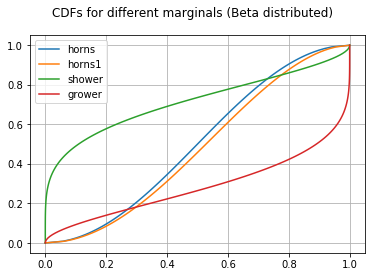

In [3]:
n=120
smpl=np.linspace(0,1,num=n)
params={}
cdfs={'horns':spst.beta.cdf(smpl,0.5,0.5),
      'horns1':spst.beta.cdf(smpl,0.5,0.55),
      'shower':spst.beta.cdf(smpl,5.,2.),
      'grower':spst.beta.cdf(smpl,2.,5.)}
#plot the cdfs
fig, ax = plt.subplots()
list(map(lambda cdf: ax.plot(cdf,smpl) , cdfs.values()))
ax.legend(list(cdfs.keys()))
fig.suptitle(f'CDFs for different marginals (Beta distributed)')
plt.grid()
plt.savefig('./.to_ignore/out/cdfs_beta_different.png', dpi=120)
plt.show()

# Visualise bounds for combinations of distributions

In [19]:
def plot_frechet_plotly(x,y,xlabel,ylabel,figname):
    bottom_frechet = lambda x,y: np.array([max(xi+y[i]+1-2, 0) 
                                         for i,xi in enumerate(x) ])
    top_frechet = lambda x,y: np.array([min(xi,y[i]) for i,xi in enumerate(x)])
    
    u,v = np.meshgrid(x,y)
    u = u.flatten()
    v = v.flatten()
    
    points2D = np.vstack([u,v]).T
    tri = Delaunay(points2D)
    simplices = tri.simplices

    figbottom = FF.create_trisurf(x=u, y=v, z=bottom_frechet(u,v),
                             simplices=simplices,
                             colormap=['#ffdbc5','#ff9d76','#ef4339'],
                             plot_edges=False,
                             title=figname, aspectratio=dict(x=1, y=1, z=0.3))
    figtop = FF.create_trisurf(x=u, y=v, z=top_frechet(u,v),
                             simplices=simplices,
                             colormap=['#46b3e6','#4d80e4','#2e279d'],
                             plot_edges=False,
                             title=figname, aspectratio=dict(x=1, y=1, z=0.3))
    return figtop,figbottom

In [20]:
x=cdfs['horns']
y=cdfs['shower']
figtop,figbottom=plot_frechet_plotly(x,y,'horns','shower','frechet_horns_shower')

In [21]:
figtop

In [ ]:
x=cdfs['grower']
y=cdfs['shower']
fig1=plot_frechet_plotly(x,y,'grower','shower','frechet_grower_shower')
fig1

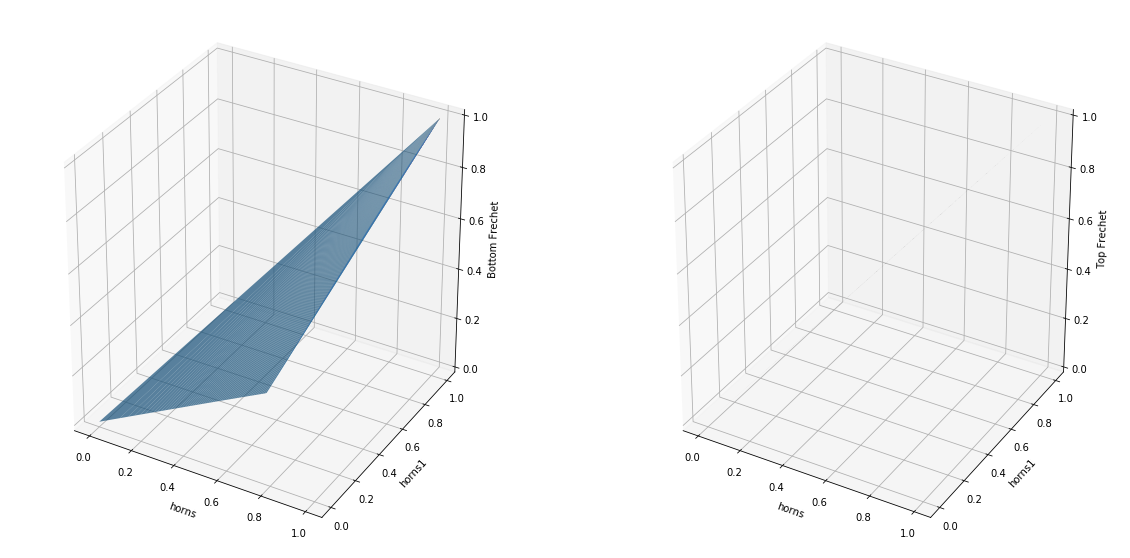

In [8]:
x=cdfs['horns']
y=cdfs['horns1']
fig2=plot_frechet_mpl(x,y,'horns','horns1','frechet_very_similar_dfs')
fig2